In [2]:
def huffman_tree(itens : list):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c in set(itens):
        f.append(  {'prob':itens.count(c)/len(itens), 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

from pprint import pprint
pprint(huffman_tree([1, 255, 1, 255, 1, 100, 101, 102]))

{'filho_0': {'prob': 0.375, 'valor': 1},
 'filho_1': {'filho_0': {'prob': 0.25, 'valor': 255},
             'filho_1': {'filho_0': {'prob': 0.125, 'valor': 102},
                         'filho_1': {'filho_0': {'prob': 0.125, 'valor': 100},
                                     'filho_1': {'prob': 0.125, 'valor': 101},
                                     'prob': 0.25,
                                     'valor': 'NAO_FOLHA'},
                         'prob': 0.375,
                         'valor': 'NAO_FOLHA'},
             'prob': 0.625,
             'valor': 'NAO_FOLHA'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


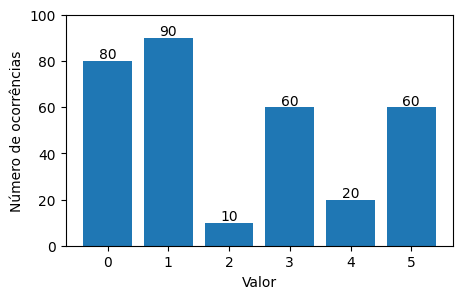

In [9]:
import numpy as np
values = np.random.randint(1, 10, 6) * 10
x = range(len(values))
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.bar(x, values)
for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')
plt.xticks(x)
plt.ylabel('Número de ocorrências')
plt.ylim(0, max(values)+10)
plt.xlabel('Valor')
plt.show()

In [11]:
def huffman_tree_from_item_probs(items : list, probs : list):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c, p in zip(items, probs):
        f.append(  {'prob':p, 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

from pprint import pprint
pprint(huffman_tree_from_item_probs([0, 1, 2, 3], [0.1, 0.2, 0.3, 0.4]))

{'filho_0': {'prob': 0.4, 'valor': 3},
 'filho_1': {'filho_0': {'prob': 0.3, 'valor': 2},
             'filho_1': {'filho_0': {'prob': 0.1, 'valor': 0},
                         'filho_1': {'prob': 0.2, 'valor': 1},
                         'prob': 0.30000000000000004,
                         'valor': 'NAO_FOLHA'},
             'prob': 0.6000000000000001,
             'valor': 'NAO_FOLHA'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


In [12]:
def get_code_dict_from_tree(tree:dict):
    """Retorna um dicionario com os codigos de cada item"""
    def get_code_dict_from_tree_rec(tree, code, code_dict):
        if tree['valor'] != 'NAO_FOLHA':
            code_dict[tree['valor']] = code
        else:
            get_code_dict_from_tree_rec(tree['filho_0'], code+'0', code_dict)
            get_code_dict_from_tree_rec(tree['filho_1'], code+'1', code_dict)
    
    code_dict = {}
    get_code_dict_from_tree_rec(tree, '', code_dict)
    return code_dict

get_code_dict_from_tree(huffman_tree_from_item_probs([0, 1, 2, 3], [0.1, 0.2, 0.3, 0.4]))

{3: '0', 2: '10', 0: '110', 1: '111'}

In [14]:
def huffman_encode(tree:dict, data:list):
    """Codifica uma lista de dados usando a arvore de huffman"""
    code_dict = get_code_dict_from_tree(tree)
    return ''.join([code_dict[c] for c in data])


In [18]:
tree = huffman_tree_from_item_probs([0, 1, 2, 3], [0.1, 0.2, 0.3, 0.4])
huffman_encode(tree, [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

'110110110111111111101010000000000000000000'

Romeu está tentando impressionar Julieta com presentes. A cada dia, Romeu envia um presente. Porém, Julieta descobriu que Romeu segue um padrão estranho em seus presentes. Romeu sempre envia, a cada dia, ou um Anel, ou um Bombom, ou um Colar. Só que eles estão organizados de uma forma estranha:

* Se num dia Romeu enviou um Anel, ele sempre tem 60% de chance de enviar um Bombom e 40% de chance de enviar um Colar no dia seguinte.
* Se enviou um Bombom em um dia, tem 60% de chance de enviar um Anel e 50% de chance de enviar um Colar no dia seguinte.
* Se enviou num dia um Colar, tem 70% de chance de enviar um Bombom e 30% de chance de enviar um Anel no dia seguinte.

Assumindo que Romeu manterá esse padrão, então, ao longo de 100 dias deste estranho cortejo, quantos anéis, bombons e colares Julieta pode esperar receber?


In [38]:
A = np.array([[0, 0.5, 0.3], [0.6, 0, 0.7], [0.4, 0.5, 0]])
print(A)
w, h = np.linalg.eig(A)
print(w)
print(h)
p = h[:,0]/np.sum(h[:,0])
print(np.round(p*100,1))

[[0.  0.5 0.3]
 [0.6 0.  0.7]
 [0.4 0.5 0. ]]
[ 1.         -0.35857864 -0.64142136]
[[-0.50045921 -0.79410449  0.47596315]
 [-0.67754478  0.23258782 -0.81251992]
 [-0.53895607  0.56151667  0.33655677]]
[29.1 39.5 31.4]
